<IMG SRC='https://investree.id/v3/1598541183130/img/inv_logo.55026ac7.png' align='LEFT' width='20%' />

<b>Partnership Assessment Analysis |</b> <br /> PT Raksasa Laju Lintang (Rarali)
<br />
<ul>Teams:
    <li>Malna (Risk, Analyst)</li>
    <li>Abid (Risk)</li>
    <li>Adryan (Risk)</li>
    <li>Joko Purwanto (Risk)</li>
</ul>

<i>Revision Log</i>
<table align='left'>
    <tr><td><b>No.</b></td><td><b>Desc</b></td><td><b>Report Version</b></td><td><b>Engine Version</b></td><td><b>Changelog</b></td><td><b>Finalized On</b></td><td><b>Circulated On</b></td></tr>
    <tr><td>1</td><td>Initial Versions</td><td>1.0</td><td>1.0</td><td>Initial release of Rarali Analysis</td><td>-</td><td>-</td></tr>
</table>

<p style="font-size:8pt;"><b>Disclaimer:</b> this report is strictly confidential and solely for the use of PT Investree Radhika Jaya, Investree (Thailand, Investree Philippines, and PT Raksasa Laju Lintang. The content have been summarized to suit needs; for actual definitions, descriptions and exclusion, please refer to the corresponding directorate.</p>

<hr />

In [87]:
#Supply Chain

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date

In [89]:
#Get current date
refer_analysis_time = date.today()
print('Analysis Time ', refer_analysis_time)

Analysis Time  2020-11-13


In [90]:
#To import data and see first-5 row of the data an its header
url_buyer = 'Data Buyer Dummy.csv'
url_po = 'Purchase Order Dummy.csv'
url_supplier = 'Data Supplier Dummy.csv'

df_buyer = pd.read_csv(url_buyer, sep=';')
print(df_buyer.head())
df_po = pd.read_csv(url_po, sep=';')
print(df_po.head())
df_supplier = pd.read_csv(url_supplier, sep=';')
print(df_supplier.head())

   BUYER_ID         BUYER_BUSINESS_PATTERN BUYER_GENDER BUYER_ROLES  \
0         1  PEMILIK / KARYAWAN PERUSAHAAN    LAKI-LAKI       OWNER   
1         2            INDIVIDUAL / ONLINE    LAKI-LAKI       OWNER   
2         3          TIDAK MEMILIKI BISNIS    PEREMPUAN       OWNER   
3         4  PEMILIK / KARYAWAN PERUSAHAAN    LAKI-LAKI       OWNER   
4         5  PEMILIK / KARYAWAN PERUSAHAAN    LAKI-LAKI       OWNER   

  BUYER_PHONE_NUMBER BUYER_COMPANY_TYPE BUYER_COMPANY_NAME_ID  \
0           6,29E+12                 PT             MAJU JAYA   
1         6244331654                 CV       BERDIRI SENDIRI   
2        62344543423                 CV        MAKMUR SENTOSA   
3        62344543411                 PT           HARUM WANGI   
4        62344543424                 CV           KERAS TEGAS   

           BUYER_PRODUCT_LIKE BUYER_BUSINESS_TYPE        BUYER_WEBSITE  \
0     READYMIX BETON, PRECAST  PRINSIPAL / PABRIK  HTTPS://ADAMAME.COM   
1           ABU TERBANG 1 TON  PRI

In [91]:
#To define datatype of each column - please refer to the analyst for the judgements
##Supplier
sup_int_list = ['YEAR_OF_ESTABLISHMENT','SOLD_PRODUCT','ITEM_TRANSACTION','TOTAL_REPORT_PRODUCT','SUPPLIER_RATING']
sup_flt_list = []
sup_str_list = ['SUPPLIER_ID','SUPPLIER_ENTITY','SUPPLIER_MAIN_PRODUCT_TYPE','SUPPLIER_OTHER_PRODUCT_TYPE','FLAG_SUPPLIER_RARALI_ONLY','SUPPLIER_LOCATION','CP_NAME','CP_ROLES','CP_PHONE_NUMBER','SUPPLIER_CERTIFIED_DOCUMENTS','SUPPLIER_POSTCODE','SUPPLIER_GENDER','SUPPLIER_AGE','SUPPLIER_INDUSTRY','SUPPLIER_POSTCODE','SUPPLIER_PAYMENT_TYPE_PREF','SUPPLIER_TENURE_PREF','SUPPLIER_COMPANY_NAME','SUPPLIER_BANK_ACCOUNT']
sup_boo_list = []
sup_dti_list = ['REG_DATE','LAST_DATA_UPDATE']

##Purchase Order
po_int_list = ['QTY','PO_TOTAL','DISCOUNT_TOTAL']
po_flt_list = []
po_str_list = ['PO_ID','SUPPLIER_ID','BUYER_ID','DELIVERY_LOCATION','PRODUCT_DESC','PRODUCT_TYPE','MEASUREMENT_UNIT','TERM_OF_PAYMENT', 'DELIVERY_POSTCODE']
po_boo_list = []
po_dti_list = ['PO_DATE','EXP_RECEIPT_DATE','ACT_RECEIPT_DATE','ACT_SETTLE_DATE']

##Buyer
buy_int_list = ['BUYER_COUNT_UPDATE','BUYER_AGE']
buy_flt_list = []
buy_str_list = ['BUYER_ANNUAL_VOLUME','BUYER_ID','BUYER_BUSINESS_PATTERN','BUYER_GENDER','BUYER_ROLES','BUYER_PHONE_NUMBER','BUYER_COMPANY_TYPE','BUYER_COMPANY_NAME_ID','BUYER_PRODUCT_LIKE','BUYER_BUSINESS_TYPE','BUYER_WEBSITE','BUYER_INDUSTRY','BUYER_PROC_FREQ','BUYER_BANK_ACCOUNT','BUYER_PAYMENT_TYPE_PREF','BUYER_TENURE_PREF']
buy_boo_list = []
buy_dti_list = ['BUYER_LAST_UPDATE','BUYER_FIRST_TRANSACTION_DATE']

target = []

non_inf = []




In [92]:
#Supplier
for col in sup_int_list:
    print(col)
    df_supplier[col] = df_supplier[col].astype('Int64')
for col in sup_flt_list:
    print(col)
    df_supplier[col] = df_supplier[col].astype('float64')
for col in sup_str_list:
    df_supplier[col] = df_supplier[col].astype('object')
for col in sup_boo_list:
    df_supplier[col] = df_supplier[col].astype('bool')
for col in sup_dti_list:
    df_supplier[col] = df_supplier[col].astype('datetime64')

#PO
for col in po_int_list:
    print(col)
    df_po[col] = df_po[col].astype('Int64')
for col in po_flt_list:
    df_po[col] = df_po[col].astype('float64')
for col in po_str_list:
    df_po[col] = df_po[col].astype('object')
for col in po_boo_list:
    df_po[col] = df_po[col].astype('bool')
for col in po_dti_list:
    df_po[col] = df_po[col].astype('datetime64')

#Buyer
for col in buy_int_list:
    print(col)
    df_buyer[col] = df_buyer[col].astype('Int64')
for col in buy_flt_list:
    df_buyer[col] = df_buyer[col].astype('float64')
for col in buy_str_list:
    df_buyer[col] = df_buyer[col].astype('object')
for col in buy_boo_list:
    df_buyer[col] = df_buyer[col].astype('bool')
for col in buy_dti_list:
    df_buyer[col] = df_buyer[col].astype('datetime64')

YEAR_OF_ESTABLISHMENT
SOLD_PRODUCT
ITEM_TRANSACTION
TOTAL_REPORT_PRODUCT
SUPPLIER_RATING
QTY
PO_TOTAL
DISCOUNT_TOTAL
BUYER_COUNT_UPDATE
BUYER_AGE


# 1. Business and Credit Process


<p>This refer to ecosystem form partnership assessment of Partner</p>

<b>1.I Business Model</b>

<i>Nothing to show</i>

<b>1.II Process Flow</b>

<i>Nothing to show</i>

<b>1.III Credit Assessment</b>

<img src='1.png' />

<h5 align='center'>--- This is the end of <u>Business and Credit Process</u> section ---</h5>

<h5 align='center'>.</h5>

# 2. Data Info

This section gives picture about data given from partner

In [93]:
df_for_di = [[os.path.splitext(url_supplier)[0], round((os.stat(url_supplier).st_size / (1024 * 1024)),3),os.path.splitext(url_supplier)[1], df_supplier.shape[1],(df_supplier.shape[1] - len(non_inf)),df_supplier.shape[0],df_supplier.isna().sum().sum() / (df_supplier.shape[0]*df_supplier.shape[1]),'-']]
df_for_di.append([os.path.splitext(url_po)[0], round((os.stat(url_po).st_size / (1024 * 1024)),3),os.path.splitext(url_po)[1], df_po.shape[1],(df_po.shape[1] - len(non_inf)),df_po.shape[0],df_po.isna().sum().sum() / (df_po.shape[0]*df_po.shape[1]),'-'])
df_for_di.append([os.path.splitext(url_buyer)[0], round((os.stat(url_buyer).st_size / (1024 * 1024)),3),os.path.splitext(url_buyer)[1], df_buyer.shape[1],(df_buyer.shape[1] - len(non_inf)),df_buyer.shape[0],df_buyer.isna().sum().sum() / (df_buyer.shape[0]*df_buyer.shape[1]),'-'])
df_for_di = pd.DataFrame(df_for_di, columns = ['Filename','Filesize (In MB)','Format','Total Columns','Informative Columns*','Total Rows','Missing Values (%)**','Remarks'])
df_for_di

,Filename,Filesize (In MB),Format,Total Columns,Informative Columns*,Total Rows,Missing Values (%)**,Remarks
0,Data Supplier Dummy,0.002,.csv,25,25,10,0.076,-
1,Purchase Order Dummy,0.002,.csv,16,16,10,0.000,-
2,Data Buyer Dummy,0.003,.csv,20,20,10,0.045,-


<p style="font-size:8pt;">
    <i>* Informative columns is the number of total columns that important to use in analysis. This based on analyst judgement, and if a column consist of the same value, it's categorized as unimportant</i>
        <br /><i>** Percentage of missing values = total NULL cells / total cells. '0.6' means 60%, so 1 is equal to 100%</i></p>

In [94]:
#Checking variabel yg ada dan yg kurang apa
##Try-except biar run nya tetep lanjut
column_df_buyer = ['BUYER_ID', 'BUYER_BUSINESS_PATTERN', 'BUYER_GENDER', 'BUYER_ROLES', 'BUYER_PHONE_NUMBER', 'BUYER_COMPANY_TYPE', 'BUYER_COMPANY_NAME_ID', 'BUYER_PRODUCT_LIKE', 'BUYER_BUSINESS_TYPE', 'BUYER_WEBSITE', 'BUYER_INDUSTRY', 'BUYER_PROC_FREQ', 'BUYER_ANNUAL_VOLUME', 'BUYER_BANK_ACCOUNT', 'BUYER_LAST_UPDATE', 'BUYER_COUNT_UPDATE', 'BUYER_PAYMENT_TYPE_PREF', 'BUYER_TENURE_PREF', 'BUYER_AGE', 'BUYER_FIRST_TRANSACTION_DATE']
column_df_po = ['PO_ID', 'SUPPLIER_ID', 'BUYER_ID', 'DELIVERY_LOCATION', 'PO_DATE', 'PRODUCT_DESC', 'PRODUCT_TYPE', 'QTY', 'MEASUREMENT_UNIT', 'TERM_OF_PAYMENT', 'PO_TOTAL', 'DISCOUNT_TOTAL', 'EXP_RECEIPT_DATE', 'ACT_RECEIPT_DATE', 'ACT_SETTLE_DATE', 'DELIVERY_POSTCODE']
column_df_supplier = ['SUPPLIER_ID', 'REG_DATE', 'YEAR_OF_ESTABLISHMENT', 'SUPPLIER_ENTITY', 'SUPPLIER_MAIN_PRODUCT_TYPE', 'SUPPLIER_OTHER_PRODUCT_TYPE', 'FLAG_SUPPLIER_RARALI_ONLY', 'SUPPLIER_LOCATION', 'SUPPLIER_RATING', 'SOLD_PRODUCT', 'ITEM_TRANSACTION', 'TOTAL_REPORT_PRODUCT', 'LAST_DATA_UPDATE', 'CP_NAME', 'CP_ROLES', 'CP_PHONE_NUMBER', 'SUPPLIER_CERTIFIED_DOCUMENTS', 'SUPPLIER_GENDER', 'SUPPLIER_AGE', 'SUPPLIER_INDUSTRY', 'SUPPLIER_POSTCODE', 'SUPPLIER_PAYMENT_TYPE_PREF', 'SUPPLIER_TENURE_PREF', 'SUPPLIER_COMPANY_NAME', 'SUPPLIER_BANK_ACCOUNT']

df_buyer_exist = list(set(df_buyer.columns) & set(column_df_buyer))
df_buyer_not_exist = [x for x in column_df_buyer if x not in df_buyer_exist]
# print('Data mengenai Buyer yang diberikan oleh partner terdapat variabel ' + str(df_buyer_exist))
# print('\n')
# print('Data mengenai Buyer yang tidak dilengkapi oleh partner adalah ' + str(df_buyer_not_exist))
# print('\n')

df_po_exist = list(set(df_po.columns) & set(column_df_po))
df_po_not_exist = [x for x in column_df_po if x not in df_po_exist]
# print('Data mengenai Purchase Order yang diberikan oleh partner terdapat variabel ' + str(df_po_exist))
# print('\n')
# print('Data mengenai Purchase Order yang tidak dilengkapi oleh partner adalah ' + str(df_po_not_exist))
# print('\n')

df_supplier_exist = list(set(df_supplier.columns) & set(column_df_supplier))
df_supplier_not_exist = [x for x in column_df_supplier if x not in df_supplier_exist]
# print('Data mengenai Supplier yang diberikan oleh partner terdapat variabel ' + str(df_supplier_exist))
# print('\n')
# print('Data mengenai Supplier yang tidak dilengkapi oleh partner adalah ' + str(df_supplier_not_exist))

df_var = []
df_var.append(['Data Supplier', df_supplier_exist, len(df_supplier_exist), df_supplier_not_exist, len(df_supplier_not_exist)])
df_var.append(['Data Purchase Order', df_po_exist, len(df_po_exist), df_po_not_exist, len(df_po_not_exist)])
df_var.append(['Data Buyer', df_buyer_exist, len(df_buyer_exist), df_buyer_not_exist, len(df_buyer_not_exist)])
df_var = pd.DataFrame(df_var, columns = ['Data', 'Variable Exist', 'Count of Variable Exist', 'Variable Not Exist', 'Count of Variable Not Exist'])
df_var



,Data,Variable Exist,Count of Variable Exist,Variable Not Exist,Count of Variable Not Exist
0,Data Supplier,"[SUPPLIER_AGE, LAST_DATA_UPDATE, SUPPLIER_TENU...",25,[],0
1,Data Purchase Order,"[ACT_SETTLE_DATE, DISCOUNT_TOTAL, PO_ID, PRODU...",16,[],0
2,Data Buyer,"[BUYER_PAYMENT_TYPE_PREF, BUYER_ANNUAL_VOLUME,...",20,[],0


In [95]:
## Check Missing Value
def check_missing_value(df): 
    '''
     Fungsi get_missing_value
     Input berupa pandas dataframe
     Output/return menghasilkan tabel yang berisi kolom beserta jumlah dan presentase missing value pada dataset 
    '''

    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data.loc[missing_data['Percent']>0]
    print(missing_data)
    if missing_data.shape[0]!=0:
        f, ax = plt.subplots(figsize=(5, 5))
        plt.xticks(rotation='90')
        sns.barplot(y=missing_data.index, x=missing_data['Percent'])
        plt.ylabel('Features', fontsize=15)
        plt.xlabel('Percent of missing values', fontsize=15)
        plt.xlim(0, 1)
        plt.title('Percent missing data by feature', fontsize=15)
        return missing_data
    else:
        print('Tidak ada missing value!!!')

                       Total  Percent
SUPPLIER_BANK_ACCOUNT     10      1.0
SUPPLIER_COMPANY_NAME      9      0.9
Empty DataFrame
Columns: [Total, Percent]
Index: []
Tidak ada missing value!!!
               Total  Percent
BUYER_WEBSITE      9      0.9


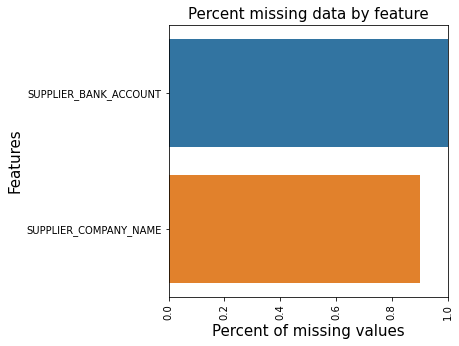

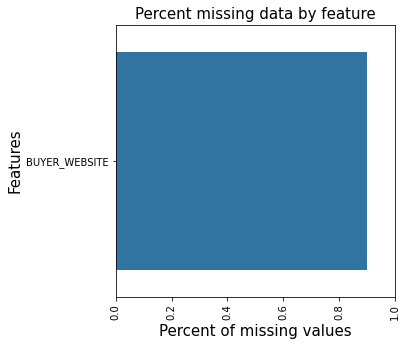

In [96]:
all_df = [df_supplier, df_po, df_buyer]

for data in all_df:
    check_missing_value(data)

<h5 align='center'>--- This is the end of <u>Data Info</u> section ---</h5>

<h5 align='center'>.</h5>

# 3. Modeling

This section gives modeling strategy to predict either limit or potential borrower performance in Investree product

In [97]:
try:
    df_pivot = df_po
    df_pivot['ACT_SETTLE_DATE'] = df_pivot['ACT_SETTLE_DATE'].apply(pd.to_datetime)
    df_pivot['ACT_SETTLE_DATE'] = df_pivot['ACT_SETTLE_DATE'].dt.strftime('%Y-%m')
except:
    print('ACT_SETTLE_DATE is not available')

Purchase Order Total Based on Date

In [98]:
try:
    df_pivot_amt = df_pivot.groupby(['BUYER_ID','ACT_SETTLE_DATE'])['PO_TOTAL'].sum().unstack(fill_value=np.nan).reset_index().rename_axis(None, axis=1).set_index('BUYER_ID')

    df_pivot_amt['rerata_amt_nonzero_exc'] = df_pivot_amt.mean(axis=1)

    print(df_pivot_amt)
except:
    print('ACT_SETTLE_DATE or PO_TOTAL is not available')

            2019-03   2019-06  2019-09    2019-12  rerata_amt_nonzero_exc
BUYER_ID                                                                 
1         575000000      <NA>     <NA>       <NA>             575000000.0
2         300000000      <NA>     <NA>       <NA>             300000000.0
3         500000000      <NA>     <NA>       <NA>             500000000.0
4              <NA>  79000000     <NA>       <NA>              79000000.0
5              <NA>      <NA>  5000000       <NA>               5000000.0
10         10000000      <NA>     <NA>       <NA>              10000000.0
565            <NA>      <NA>     <NA>  150000000             150000000.0


Quantity Based on Date

In [136]:
try:
    df_pivot_qty = pd.pivot_table(df_pivot,index=['BUYER_ID'], values=['PO_ID'], aggfunc='count',fill_value=np.nan, columns=['ACT_SETTLE_DATE'])
    df_pivot_qty['rerata_qty_nonzero_exc'] = df_pivot_qty.mean(axis=1)
    print(df_pivot_qty)
except Exception as e:
    print(e)

                  PO_ID                         rerata_qty_nonzero_exc
ACT_SETTLE_DATE 2019-03 2019-06 2019-09 2019-12                       
BUYER_ID                                                              
1                   1.0     NaN     NaN     NaN                    1.0
2                   2.0     NaN     NaN     NaN                    2.0
3                   1.0     NaN     NaN     NaN                    1.0
4                   NaN     1.0     NaN     NaN                    1.0
5                   NaN     NaN     1.0     NaN                    1.0
10                  2.0     NaN     NaN     NaN                    2.0
565                 NaN     NaN     NaN     2.0                    2.0


No numeric types to aggregate


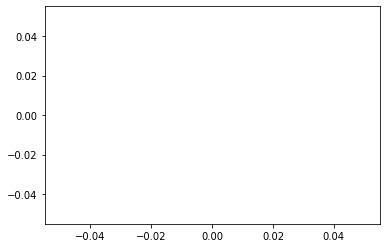

In [100]:
try:
    sns.lineplot(data=df_pivot[['PO_TOTAL', 'ACT_SETTLE_DATE']])
except Exception as e:
    print(e)

The Segmentation of Borrower Location

In [101]:
#Merge with data kodepos
try:
    postcode = pd.read_csv('Data Kodepos Indonesia.csv', sep=';')
    postcode['KABUPATEN'] = postcode['JENIS'] + ' ' + postcode['KABUPATEN']
    df_merged_loc = pd.merge(df_supplier, postcode, left_on='SUPPLIER_POSTCODE', right_on='POSTCODE', how='left')
except Exception as e:
    print(e)

In [102]:
#Provinsi
try:
    count_per_loc = df_merged_loc['PROVINSI'].value_counts().rename_axis('PROVINSI').reset_index(name='JUMLAH')
    print(count_per_loc)
except Exception as e:
    print(e)

         PROVINSI  JUMLAH
0      Jawa Barat      64
1  Sumatera Utara      26
2           Jambi      15
3   DI Yogyakarta       1


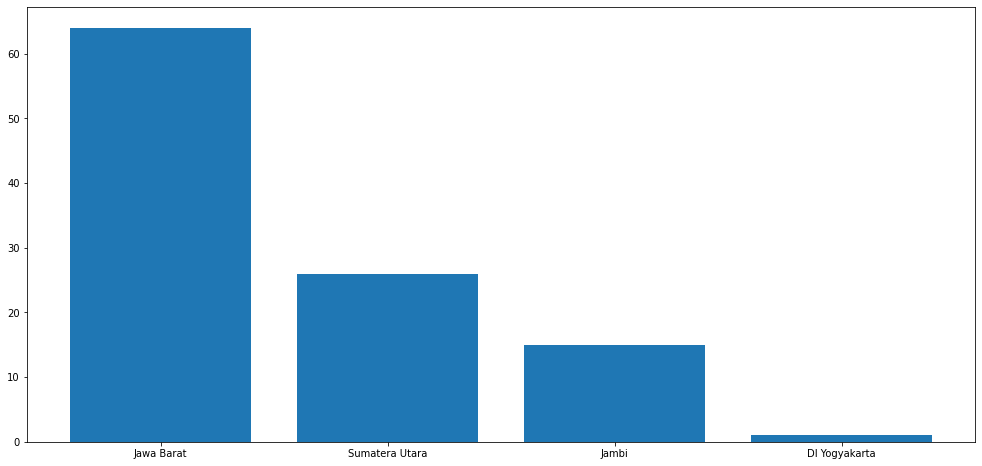

In [103]:
try:
    fig = plt.figure(figsize=(17,8))
    ax = plt.subplot(111)
    ax.bar(count_per_loc.iloc[:, 0], count_per_loc.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

In [104]:
#KABUPATEN
try:
    count_per_loc = df_merged_loc['KABUPATEN'].value_counts().rename_axis('KABUPATEN').reset_index(name='JUMLAH')
    print(count_per_loc)
except Exception as e:
    print(e)

         KABUPATEN  JUMLAH
0     Kab. Samosir      26
1      Kab. Ciamis      25
2     Kab. Cianjur      24
3       Kab. Bungo      15
4       Kab. Garut      15
5  Kota Yogyakarta       1


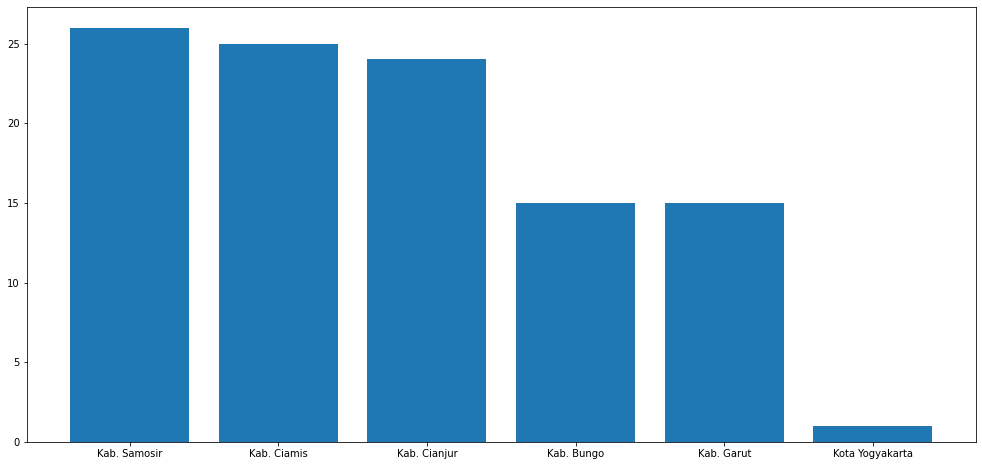

In [105]:
try:
    fig = plt.figure(figsize=(17,8))
    ax = plt.subplot(111)
    ax.bar(count_per_loc.iloc[:, 0], count_per_loc.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

Payment Type Preference

  SUPPLIER_PAYMENT_TYPE_PREF  JUMLAH
0                     Bullet       6
1                 Instalment       4


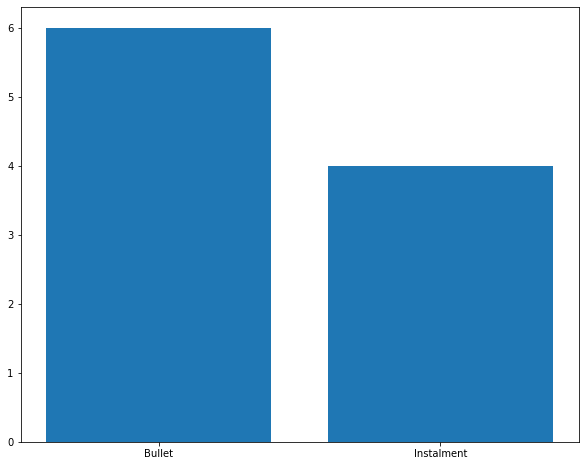

In [106]:
##Supplier
try:
    count_per_paytype = df_supplier['SUPPLIER_PAYMENT_TYPE_PREF'].value_counts().rename_axis('SUPPLIER_PAYMENT_TYPE_PREF').reset_index(name='JUMLAH')
    print(count_per_paytype)

    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_paytype.iloc[:, 0], count_per_paytype.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

  BUYER_PAYMENT_TYPE_PREF  JUMLAH
0                  BULLET       6
1              INSTALMENT       4


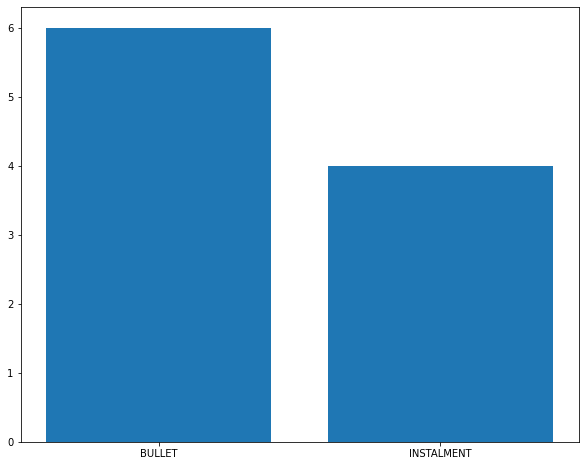

In [107]:
##Buyer
try:
    count_per_paytype = df_buyer['BUYER_PAYMENT_TYPE_PREF'].value_counts().rename_axis('BUYER_PAYMENT_TYPE_PREF').reset_index(name='JUMLAH')
    print(count_per_paytype)

    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_paytype.iloc[:, 0], count_per_paytype.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

Tenure Preference

   SUPPLIER_TENURE_PREF  JUMLAH
0                    60       6
1                    30       2
2                    90       2


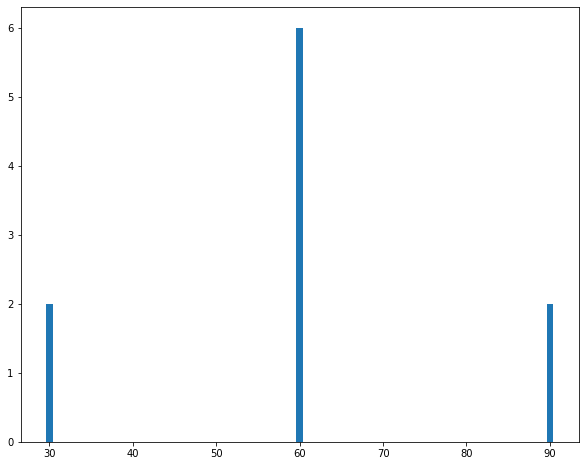

In [108]:
##Supplier
try:
    count_per_tenpref = df_supplier['SUPPLIER_TENURE_PREF'].value_counts().rename_axis('SUPPLIER_TENURE_PREF').reset_index(name='JUMLAH')
    print(count_per_tenpref)

    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_tenpref.iloc[:, 0], count_per_tenpref.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

   BUYER_TENURE_PREF  JUMLAH
0                 60       5
1                 30       3
2                 90       2


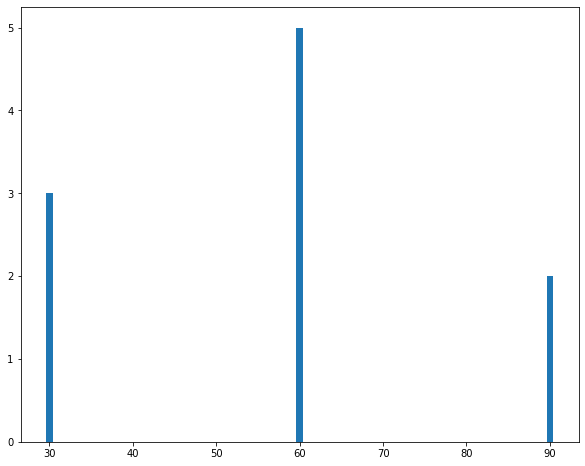

In [109]:
##Buyer
try:
    count_per_tenpref = df_buyer['BUYER_TENURE_PREF'].value_counts().rename_axis('BUYER_TENURE_PREF').reset_index(name='JUMLAH')
    print(count_per_tenpref)

    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_tenpref.iloc[:, 0], count_per_tenpref.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

Demographic of Borrower
PT CV


  SUPPLIER_GENDER  JUMLAH
0            PRIA       7
1          WANITA       3


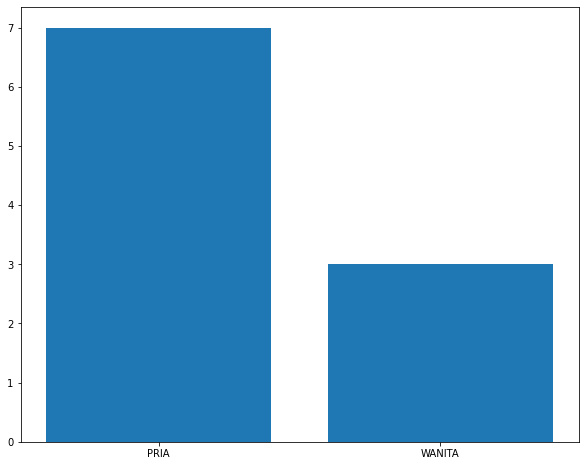

In [110]:
#supplier
try:
    count_per_sex = df_supplier['SUPPLIER_GENDER'].value_counts().rename_axis('SUPPLIER_GENDER').reset_index(name='JUMLAH')
    print(count_per_sex)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_sex.iloc[:, 0], count_per_sex.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

  BUYER_GENDER  JUMLAH
0    LAKI-LAKI       8
1    PEREMPUAN       2


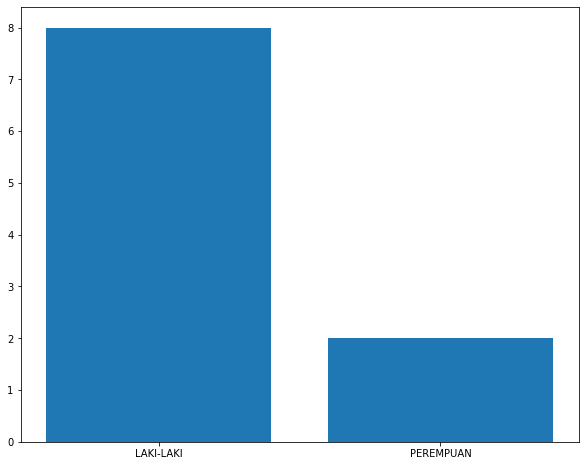

In [111]:
#buyer
try:
    count_per_sex = df_buyer['BUYER_GENDER'].value_counts().rename_axis('BUYER_GENDER').reset_index(name='JUMLAH')
    print(count_per_sex)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_sex.iloc[:, 0], count_per_sex.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

   SUPPLIER_AGE  JUMLAH
0            55       2
1            56       1
2            44       1
3            57       1
4            40       1
5            39       1
6            38       1
7            51       1
8            50       1


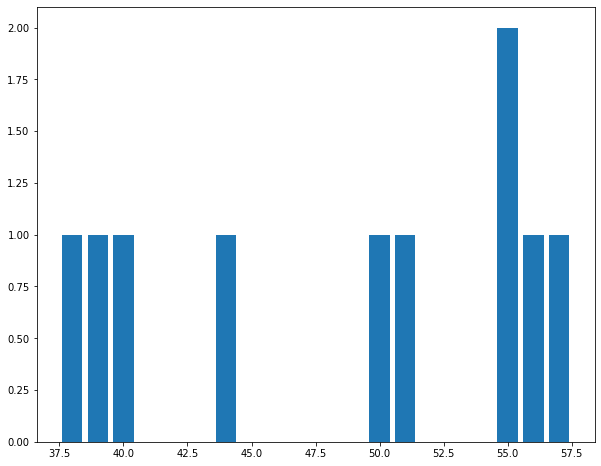

In [112]:
#supplier
try:
    count_per_age = df_supplier['SUPPLIER_AGE'].value_counts().rename_axis('SUPPLIER_AGE').reset_index(name='JUMLAH')
    print(count_per_age)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_age.iloc[:, 0], count_per_age.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

   BUYER_AGE  JUMLAH
0         32       1
1         33       1
2         37       1
3         53       1
4         54       1
5         55       1
6         40       1
7         41       1
8         61       1
9         47       1


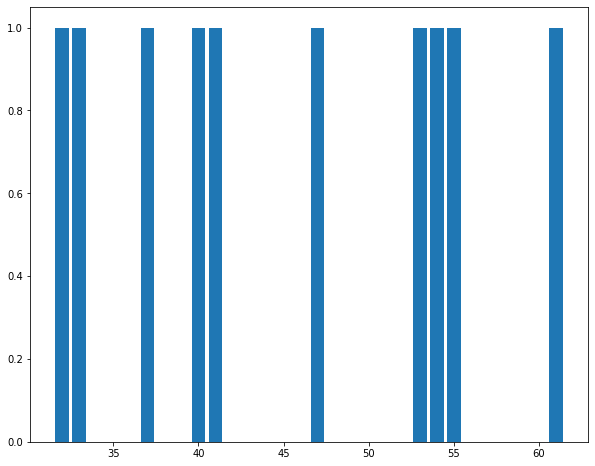

In [113]:
#buyer
try:
    count_per_age = df_buyer['BUYER_AGE'].value_counts().rename_axis('BUYER_AGE').reset_index(name='JUMLAH')
    print(count_per_age)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_age.iloc[:, 0], count_per_age.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

Borrower Sector

          SUPPLIER_INDUSTRY  JUMLAH
0                      JASA       3
1                 TEKNOLOGI       3
2                   MAKANAN       2
3  PERHOTELAN DAN AKOMODASI       2


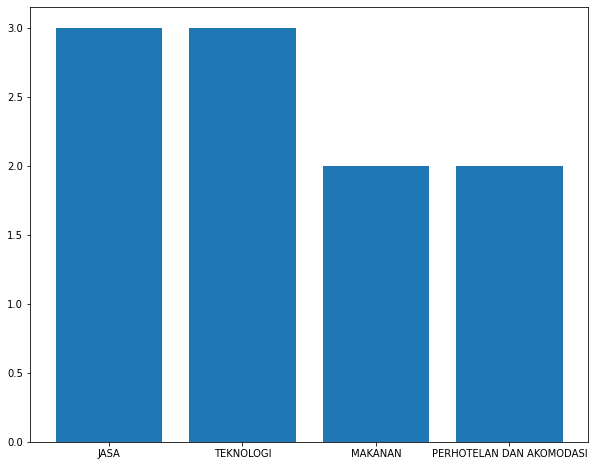

In [114]:
#supplier
try:
    count_per_sector = df_supplier['SUPPLIER_INDUSTRY'].value_counts().rename_axis('SUPPLIER_INDUSTRY').reset_index(name='JUMLAH')
    print(count_per_sector)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_sector.iloc[:, 0], count_per_sector.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

                 BUYER_INDUSTRY  JUMLAH
0  MACHINERY & INDUSTRIAL PARTS       3
1                ALAT KESEHATAN       2
2                 ALAT BANGUNAN       2
3                   ELECTRONICS       1
4            BUILDING MATERIALS       1
5                 ALAT KEAMANAN       1


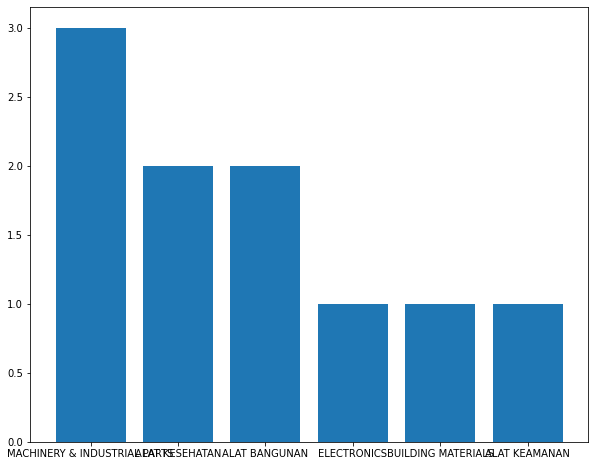

In [115]:
#buyer
try:
    count_per_sector = df_buyer['BUYER_INDUSTRY'].value_counts().rename_axis('BUYER_INDUSTRY').reset_index(name='JUMLAH')
    print(count_per_sector)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_sector.iloc[:, 0], count_per_sector.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

Bank Account

In [118]:
# ##Supplier
# try:
#     print(df_supplier[['SUPPLIER_ID','SUPPLIER_COMPANY_NAME', 'SUPPLIER_BANK_ACCOUNT']])

# ##Buyer
#     print(df_buyer[['BUYER_ID', 'BUYER_COMPANY_NAME_ID', 'BUYER_BANK_ACCOUNT']])
# except Exception as e:
#     print(e)

Term of Payment

  TERM_OF_PAYMENT  JUMLAH
0           NET30       6
1           NET60       4


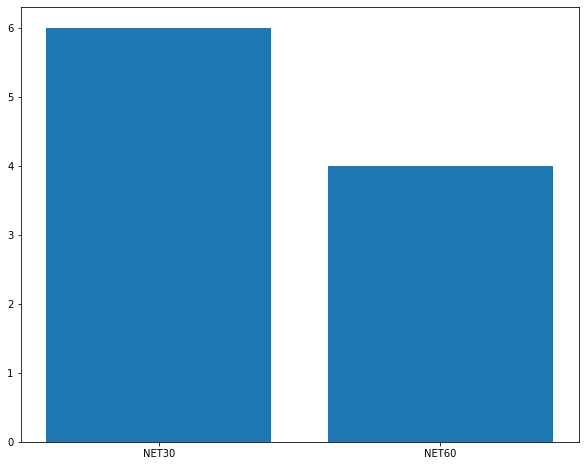

In [119]:
try:
    count_per_top = df_po['TERM_OF_PAYMENT'].value_counts().rename_axis('TERM_OF_PAYMENT').reset_index(name='JUMLAH')
    print(count_per_top)
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_top.iloc[:, 0], count_per_top.iloc[:, 1])

    plt.show()
except Exception as e:
    print(e)

Period
Min max potong 5

C:\Users\investree\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


   PERIOD  JUMLAH
0      22       2
1      29       1
2      75       1
3      11       1
4      10       1
5      57       1
6      43       1
7       6       1
8      65       1


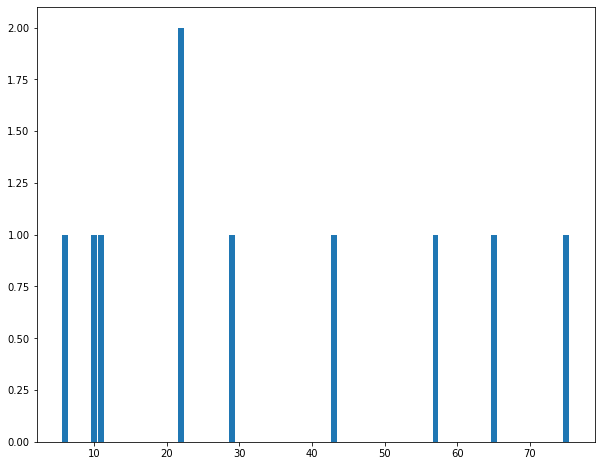

In [144]:
##Buyer
try:
    df_buyer['BUYER_PERIOD'] = None
    for i in range(0, len(df_buyer['BUYER_FIRST_TRANSACTION_DATE'])):
        df_buyer['BUYER_PERIOD'][i] = (refer_analysis_time.year - df_buyer['BUYER_FIRST_TRANSACTION_DATE'][i].year) * 12 + (refer_analysis_time.month - df_buyer['BUYER_FIRST_TRANSACTION_DATE'][i].month)

    count_per_period = df_buyer['BUYER_PERIOD'].value_counts().rename_axis('PERIOD').reset_index(name='JUMLAH')
    print(count_per_period)

    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(count_per_period.iloc[:, 0], count_per_period.iloc[:, 1])

except Exception as e:
    print(e)

In [126]:
df_buyer

,BUYER_ID,BUYER_BUSINESS_PATTERN,BUYER_GENDER,BUYER_ROLES,BUYER_PHONE_NUMBER,BUYER_COMPANY_TYPE,BUYER_COMPANY_NAME_ID,BUYER_PRODUCT_LIKE,BUYER_BUSINESS_TYPE,BUYER_WEBSITE,BUYER_INDUSTRY,BUYER_PROC_FREQ,BUYER_ANNUAL_VOLUME,BUYER_BANK_ACCOUNT,BUYER_LAST_UPDATE,BUYER_COUNT_UPDATE,BUYER_PAYMENT_TYPE_PREF,BUYER_TENURE_PREF,BUYER_AGE,BUYER_FIRST_TRANSACTION_DATE
0,1,PEMILIK / KARYAWAN PERUSAHAAN,LAKI-LAKI,OWNER,"6,29E+12",PT,MAJU JAYA,"READYMIX BETON, PRECAST",PRINSIPAL / PABRIK,HTTPS://ADAMAME.COM,BUILDING MATERIALS,SETIAP 4 BULAN,1 MILLION - 2 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2019-01-10,4,BULLET,30,53,2019-01-01
1,2,INDIVIDUAL / ONLINE,LAKI-LAKI,OWNER,6244331654,CV,BERDIRI SENDIRI,ABU TERBANG 1 TON,PRINSIPAL / PABRIK,NaN,ALAT BANGUNAN,SETIAP 4 BULAN,2 MILLION - 3 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2020-05-01,5,INSTALMENT,30,54,2019-01-10
2,3,TIDAK MEMILIKI BISNIS,PEREMPUAN,OWNER,62344543423,CV,MAKMUR SENTOSA,BESI ULIR 8MM,PRINSIPAL / PABRIK,NaN,ALAT BANGUNAN,SETIAP 3 BULAN,2 MILLION - 3 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2020-06-10,6,INSTALMENT,60,41,2020-01-10
3,4,PEMILIK / KARYAWAN PERUSAHAAN,LAKI-LAKI,OWNER,62344543411,PT,HARUM WANGI,HELM PROYEK KUNING ALL-FIT,PRINSIPAL / PABRIK,NaN,ALAT KEAMANAN,SETIAP 4 BULAN,2 MILLION - 3 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2020-04-15,2,INSTALMENT,90,32,2020-05-06
4,5,PEMILIK / KARYAWAN PERUSAHAAN,LAKI-LAKI,OWNER,62344543424,CV,KERAS TEGAS,STETOSKOP MERK,PRINSIPAL / PABRIK,NaN,ALAT KESEHATAN,SETIAP 2 BULAN,2 MILLION - 3 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2019-05-12,1,BULLET,90,33,2019-12-23
5,6,PEMILIK / KARYAWAN PERUSAHAAN,LAKI-LAKI,OWNER,62344543425,PT,KARYA BANGSA,ALCOHOL SWAB MERK,PRINSIPAL / PABRIK,NaN,ALAT KESEHATAN,SETIAP 4 BULAN,1 MILLION - 2 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2020-06-24,1,BULLET,60,37,2018-06-24
6,7,PEMILIK / KARYAWAN PERUSAHAAN,PEREMPUAN,OWNER,62344543427,PT,BERDIKARI,MESIN JAHIT,PRINSIPAL / PABRIK,NaN,MACHINERY & INDUSTRIAL PARTS,SETIAP 4 BULAN,2 MILLION - 3 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2019-07-08,3,BULLET,60,47,2016-02-13
7,8,PEMILIK / KARYAWAN PERUSAHAAN,LAKI-LAKI,OWNER,62344543413,PT,SENTOSA,OVEN,PRINSIPAL / PABRIK,NaN,MACHINERY & INDUSTRIAL PARTS,SETIAP 4 BULAN,1 MILLION - 2 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2019-06-06,4,BULLET,60,55,2017-04-15
8,9,PEMILIK / KARYAWAN PERUSAHAAN,LAKI-LAKI,OWNER,62344543419,PT,SEJAHTERA,TV,PRINSIPAL / PABRIK,NaN,ELECTRONICS,SETIAP 4 BULAN,2 MILLION - 3 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2019-08-29,9,BULLET,30,61,2014-08-17
9,10,PEMILIK / KARYAWAN PERUSAHAAN,LAKI-LAKI,OWNER,62344543401,PT,SUKA MAJU,KOMPOR,PRINSIPAL / PABRIK,NaN,MACHINERY & INDUSTRIAL PARTS,SETIAP 4 BULAN,2 MILLION - 3 MILLION,CIMB NIAGA 23442524654 | MANDIRI 24564443565,2020-01-11,2,INSTALMENT,60,40,2015-06-14


Ceritified Documents (KYC)

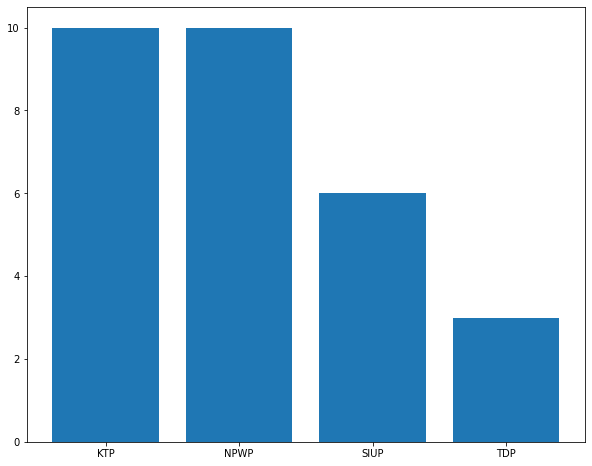

In [134]:
##Supplier
try:
    count_ktp = 0
    count_npwp = 0
    count_siup = 0
    count_tdp = 0
    for i in df_supplier['SUPPLIER_CERTIFIED_DOCUMENTS']:
        ktp = i.count('KTP')
        count_ktp = count_ktp+ktp
        npwp = i.count('NPWP')
        count_npwp = count_npwp+npwp
        siup = i.count('SIUP')
        count_siup = count_siup+siup
        tdp = i.count('TDP')
        count_tdp = count_tdp+tdp

    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(['KTP', 'NPWP', 'SIUP', 'TDP'], [count_ktp, count_npwp, count_siup, count_tdp])

    plt.show()
except Exception as e:
    print(e)

In [145]:
##Buyer
try:
    count_ktp = 0
    count_npwp = 0
    count_siup = 0
    count_tdp = 0
    for i in df_buyer['BUYER_CERTIFIED_DOCUMENTS']:
        ktp = i.count('KTP')
        count_ktp = count_ktp+ktp
        npwp = i.count('NPWP')
        count_npwp = count_npwp+npwp
        siup = i.count('SIUP')
        count_siup = count_siup+siup
        tdp = i.count('TDP')
        count_tdp = count_tdp+tdp

    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.bar(['KTP', 'NPWP', 'SIUP', 'TDP'], [count_ktp, count_npwp, count_siup, count_tdp])

    plt.show()
except Exception as e:
    print(e)

'BUYER_CERTIFIED_DOCUMENTS'
